In [1]:
import pandas as pd
import json
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_style(rc={'figure.figsize':(3.25,1), 'font.family':"Times New Roman",
                                  'font.size': 8, 'dpi': 300})

plots = "/home/djanke3/Documents/Spyder/plots/"

In [2]:
with open("L2Norm_w_Noise1.json", 'r') as f:
    data = json.load(f)
    
df = pd.DataFrame()

data_stats = {}
for i,d in data.items():
    ys = d["accs"]
    #ys["f1train"] = d["f1s"]["train"]
    #ys["f1val"] = d["f1s"]["val"]
    temp_df =  pd.DataFrame.from_dict(ys, orient = "columns")
    temp_df["wd"] = d["weight_decay"]
    df = pd.concat([df, temp_df], ignore_index = True)
    
    data_stats[i] = {}
    data_stats[i]["wd"] = d["weight_decay"]
    data_stats[i]["median_train"] = np.median(d["accs"]["train"])
    data_stats[i]["median_val"] = np.median(d["accs"]["val"])
    data_stats[i]["iqr_train"] = np.quantile(d["accs"]["train"], 0.75) - np.quantile(d["accs"]["train"], 0.25)
    data_stats[i]["iqr_val"] = np.quantile(d["accs"]["val"], 0.75) - np.quantile(d["accs"]["val"], 0.25)
print(df.shape)
df.head()
    

(330000, 3)


,train,val,wd
0,0.838411,0.826693,0.0
1,0.831380,0.821745,0.0
2,0.742795,0.730078,0.0
3,0.815712,0.827474,0.0
4,0.798785,0.778516,0.0


In [3]:
df = pd.melt(df,id_vars = "wd", value_vars = ["train", "val"])
df.head()


,wd,variable,value
0,0.0,train,0.838411
1,0.0,train,0.831380
2,0.0,train,0.742795
3,0.0,train,0.815712
4,0.0,train,0.798785


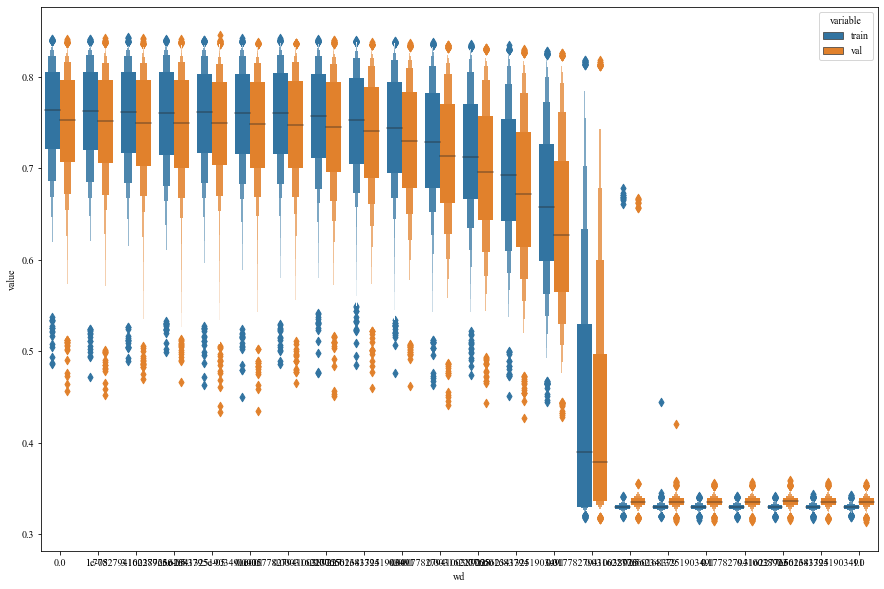

In [4]:
plt.figure(figsize = (15, 10))
sns.boxenplot(x = "wd", y = "value", hue = "variable", data = df)

In [5]:
sdf = pd.DataFrame.from_dict(data_stats, orient = "index")
sdf.head()

,wd,median_train,median_val,iqr_train,iqr_val
"trial0(12, 15, 9, 3, 1)00",0.0,0.782205,0.772396,0.103798,0.107487
"trial1(12, 15, 9, 3, 1)00",0.0,0.769097,0.760221,0.102062,0.108203
"trial2(12, 15, 9, 3, 1)00",0.0,0.752040,0.747656,0.128722,0.130794
"trial3(12, 15, 9, 3, 1)00",0.0,0.766016,0.756380,0.123622,0.129655
"trial4(12, 15, 9, 3, 1)00",0.0,0.765126,0.755404,0.115571,0.122591


/home/djanke3/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/djanke3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


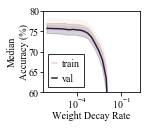

In [13]:
med_df = sdf[["wd", "median_train", "median_val"]]
med_df.columns = ["wd", "train", "val"]
med_df.loc[med_df["wd"] == 0, "wd"] = 1e-6
med_df = pd.melt(med_df,id_vars = "wd", value_vars = ["train", "val"])
med_df["value"] *= 100

fig = plt.figure()
fig.set_figheight(1.5)
fig.set_figwidth(1.75)

plt0 = sns.lineplot(x = "wd", y ="value", data = med_df, hue = "variable", palette=sns.cubehelix_palette(2))
plt.xscale("log")
handles, labels = plt0.get_legend_handles_labels()
plt0.legend(handles[1:], labels[1:], edgecolor='black', fancybox=False, loc='lower left',
           handlelength = 0.5, handletextpad = 0.5, columnspacing = 0.5)

plt0.tick_params(axis='both', which='major', pad=0)
plt.ylabel("Median\nAccuracy (%)", labelpad = 0)
plt.xlabel("Weight Decay Rate", labelpad = 0)
plt.ylim([60, 80])

fig = plt0.get_figure()
figname = plots + "VAD_L2_medians.pdf"
fig.savefig(figname, dpi=300, bbox_inches='tight')
#plt.show()

/home/djanke3/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/djanke3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


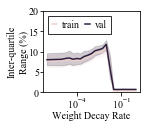

In [14]:
iqr_df = sdf[["wd", "iqr_train", "iqr_val"]]
iqr_df.columns = ["wd", "train", "val"]
iqr_df.loc[iqr_df["wd"] == 0, "wd"] = 1e-6
iqr_df = pd.melt(iqr_df,id_vars = "wd", value_vars = ["train", "val"])
iqr_df["value"] *= 100

fig = plt.figure()
fig.set_figheight(1.5)
fig.set_figwidth(1.75)

plt0 = sns.lineplot(x = "wd", y ="value", data = iqr_df, hue = "variable", palette=sns.cubehelix_palette(2))
plt.xscale("log")
handles, labels = plt0.get_legend_handles_labels()
plt0.legend(handles[1:], labels[1:], loc = "upper left", ncol = 2, edgecolor='black', fancybox=False,
           handlelength = 0.5, handletextpad = 0.5, columnspacing = 0.5)

plt0.tick_params(axis='both', which='major', pad=0)
plt.ylabel("Inter-quartile\nRange (%)", labelpad=0)
plt.xlabel("Weight Decay Rate", labelpad=0)
plt.ylim([0,20])

fig = plt0.get_figure()
figname = plots + "VAD_L2_iqr.pdf"
fig.savefig(figname, dpi=300, bbox_inches='tight')
#plt.show()